In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

**Problem 1**

$\begin{eqnarray}
P_{sw} &=& \frac{1}{T_s} \int p_a(t)\ dt = (W_{on} + W_{off})\ f_{s} \\[0.5em]
W_{on} &=& \left[\frac{1}{2} \cdot 400 \cdot 35 \cdot (1-0.75)\cdot 10^{-6}\right] + \left[100 \cdot 10 \cdot (1.5-1)\cdot 10^{-6}\right] + \left[\frac{1}{2} \cdot 300 \cdot 10 \cdot (1.5-1)\cdot 10^{-6}\right]+ \left[\frac{1}{2} \cdot 100 \cdot 10 \cdot (2-1.5) \cdot 10^{-6}\right] \\[0.5em]
W_{on} &=& = 3.25 mJ \\[0.5em]
W_{off} &=& \left[\frac{1}{2} \cdot 400 \cdot 10 \cdot (3-2.5)\cdot 10^{-6}\right] + \left[400 \cdot 5 \cdot (3.5-3)\cdot 10^{-6}\right] + \left[\frac{1}{2} \cdot 400 \cdot 5 \cdot (3.5-3)\cdot 10^{-6} \right] + \left[\frac{1}{2} \cdot 400 \cdot 5 \cdot (5-3.5)\cdot 10^{-6}\right]  \\[0.5em]
W_{off} &=& 4 mJ \\[0.5em]
W_{\text{total}} &=& W_{on} + W_{off} \\[0.5em]
W_{\text{total}} &=& 3.25mJ + 4mJ = 7.25mJ \\[0.5em]
\end{eqnarray}$

<hr>

**Problem 2**

$\begin{eqnarray}
P_{\text{Conduction}} &=& \frac{1}{T_s} \int_{0}^{D T_s} (I\cdot V_{\text{IGBT}}) dt + \frac{1}{T_s} \int_{D T_s}^{T_s} (I\cdot V_{\text{Diode}}) dt  \\[0.5em]
 &=& D (I\cdot V_{\text{IGBT}}) + (1-D)(I\cdot V_{\text{Diode}})   \\[0.5em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - V_{CE} - v_L - v\\[0.25em]
v_L &=& V_g - V_{CE} - v \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& -V_B - v_L -v \\[0.25em]
v_L &=& -(V_B + v) \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for Inductor Voltage (small ripple approx)

$\begin{eqnarray}
<v_L> &=& \frac{1}{T_S} \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& \left[D \cdot (V_g - V_{CE} - V)\right] + \left[D' \cdot (-V_B -V) \right] \\[0.25em]
0 &=& -(D+D')V + DV_g - D V_{CE} - D' V_B \\[0.25em]
0 &=& -V + DV_g - D V_{CE} - (1-D) V_B \\[0.25em]
0 &=& -(V+V_B) + D(V_g - V_{CE} + V_B) \\[0.25em]
D &=& \frac{V+V_B}{V_g - V_{CE} + V_B} = \frac{200+1.5}{400 - 2.5 + 1.5} = 0.505 \ [\text{Duty Cycle Ratio}] \\[0.25em]
\end{eqnarray}$

<hr>

$\begin{eqnarray}
P_{\text{Conduction}} &=& D (I\cdot V_{\text{IGBT}}) + (1-D)(I\cdot V_{\text{Diode}})  \\[0.5em]
&=& 0.505 \cdot (10 \cdot 2.5) + (1-0.505) \cdot (10 \cdot 1.5) \\[0.5em]
&=& 20.05 \ \text{Watts}
\end{eqnarray}$

<hr>

**Problem 3**

$\begin{eqnarray}
\eta &=& \frac{P_{out}}{P_{in}} \\[0.5em]
P_{out} &=& VI = (200)(10) = 2000W \\[0.5em]
P_{in} &=& D V_g I + P_{\text{Conduction}} + P_{sw} \\[0.5em]
&=& (0.505 \cdot 400 \cdot 10) + (20.05) + (7.25\cdot 10^{-3}f_s) \\[0.5em]
\eta &=& \frac{2000}{2040.05 + (7.25\cdot 10^{-3})f_s}
\end{eqnarray}$

In [32]:
fs = np.linspace(1e3,100e3,100)
Ts = 1/fs
Won = 3.25E-3 # Joules
Woff = 4E-3 # Joules
Wtotal = Won + Woff # Joules
Pcond = 20.05 # Watts
Pout = 200*10
Vg = 400
I = 10
D = 0.505
Pin = Vg*D*I + Pcond + Wtotal*fs

No handles with labels found to put in legend.


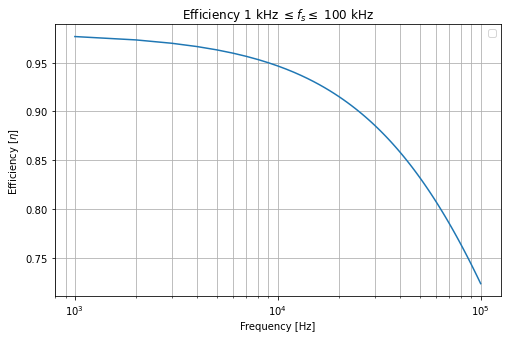

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Efficiency 1 kHz $\leq f_s \leq$ 100 kHz')
ax.semilogx(fs,Pout/Pin)
ax.set_ylabel('Efficiency [$\eta$]')
ax.set_xlabel('Frequency [Hz]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();